In [ ]:
## asynchronously pull the electricity consumption data from 2020-02-02 to 2024-10-31
## Idea is to create a predective model for a day or two from the available dataset
## try to include all the locations and save the data into cloud and model it.

In [143]:
#!pip install requests

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [87]:
#!pip install matplotlib

In [84]:
import os
import json
import requests
location_filepath="locations.json"
if not os.path.exists(location_filepath):
    with open(location_filepath,"w",encoding="utf-8") as file:
        response=requests.get("https://helsinki-openapi.nuuka.cloud/api/v1.0/Property/List")
        data=response.text
        json.dump(data,file)

In [88]:
#!pip install pandas

In [89]:
import pandas as pd

In [90]:
with open(location_filepath, "r", encoding="utf-8") as file:
    # Load the stringified JSON array
    json_content = file.read()
    # Parse the string into a Python object
    data = json.loads(json_content)
    data=json.loads(data)

# Create a pandas DataFrame
df = pd.DataFrame(data)

In [91]:
df.head()

,locationName,propertyName,propertyCode
0,1000 Hakaniemen kauppahalli,1000 Hakaniemen kauppahalli,091-011-9902-0101
1,1001 Hietalahden kauppahalli,1001 Hietalahden kauppahalli,091-004-9902-0008
2,1002 Vanha kauppahalli,1002 Vanha kauppahalli,091-003-9906-0101
3,1037 Vuotalo,1037 Vuotalo,091-054-0179-0003
4,1507 Suutarilan monitoimitalo/ala-aste ja Lpk ...,1507 Suutarilan monitoimitalo/ala-aste ja Lpk ...,091-040-0024-0003


In [92]:
df.head()

,locationName,propertyName,propertyCode
0,1000 Hakaniemen kauppahalli,1000 Hakaniemen kauppahalli,091-011-9902-0101
1,1001 Hietalahden kauppahalli,1001 Hietalahden kauppahalli,091-004-9902-0008
2,1002 Vanha kauppahalli,1002 Vanha kauppahalli,091-003-9906-0101
3,1037 Vuotalo,1037 Vuotalo,091-054-0179-0003
4,1507 Suutarilan monitoimitalo/ala-aste ja Lpk ...,1507 Suutarilan monitoimitalo/ala-aste ja Lpk ...,091-040-0024-0003


In [93]:
LocationName=list(df["locationName"][0:4])

In [94]:
dataFileNames = [f"{item.replace(' ', '_')}.json" for item in LocationName]

In [95]:
##
locationSearchString=[f"{item.replace(' ', '%20', )}" for item in LocationName]

In [44]:
## locationSearchString

['1000%20Hakaniemen%20kauppahalli',
 '1001%20Hietalahden%20kauppahalli',
 '1002%20Vanha%20kauppahalli',
 '1037%20Vuotalo']

In [96]:
dataFileNames

['1000_Hakaniemen_kauppahalli.json',
 '1001_Hietalahden_kauppahalli.json',
 '1002_Vanha_kauppahalli.json',
 '1037_Vuotalo.json']

In [97]:
reporting_group="Electricity"
start_time="2020-01-01"
end_time="2024-10-31"
version="v1.0"

In [98]:
BASE_URL = "https://helsinki-openapi.nuuka.cloud/api/v1.0/EnergyData/Hourly/ListByProperty"
output_dir = "FourlocationData20200101_20241031"
os.makedirs(output_dir, exist_ok=True)


In [142]:
#!pip install aiohttp

In [105]:
import aiohttp
import asyncio
from urllib.parse import quote

In [106]:
async def fetch_data(session, url, filename):
    async with session.get(url) as response:
        data = await response.json()
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False)
        print(f"Saved data to {filename}")

In [107]:
global count
count=0

In [108]:
async def make_requests():
    async with aiohttp.ClientSession() as session:
        for location in LocationName:
            encoded_search_string = quote(location)
            url = f"{BASE_URL}?Record=LocationName&SearchString={encoded_search_string}&ReportingGroup={reporting_group}&StartTime={start_time}&EndTime={end_time}"
            filename = os.path.join(output_dir,f"{location.replace(' ', '_')}.json")
            await fetch_data(session, url, filename)

await make_requests()

Saved data to FourlocationData20200101_20241031\1000_Hakaniemen_kauppahalli.json
Saved data to FourlocationData20200101_20241031\1001_Hietalahden_kauppahalli.json
Saved data to FourlocationData20200101_20241031\1002_Vanha_kauppahalli.json
Saved data to FourlocationData20200101_20241031\1037_Vuotalo.json


In [155]:
import pandas as pd
k_df=pd.read_json("FourlocationData20200101_20241031/1000_Hakaniemen_kauppahalli.json")

In [156]:
k_df.head()

,timestamp,reportingGroup,locationName,value,unit
0,2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
1,2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2,2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
3,2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh
4,2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh


In [157]:
k_df.head()

,timestamp,reportingGroup,locationName,value,unit
0,2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
1,2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2,2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
3,2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh
4,2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh


In [158]:
k_df.set_index("timestamp",inplace=True)

In [159]:
k_df.head()

,reportingGroup,locationName,value,unit
timestamp,,,,
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh


In [160]:
import pandas as pd

# Ensure the index is a DatetimeIndex
k_df.index = pd.to_datetime(k_df.index)

# Generate the full range of expected hourly timestamps
full_range = pd.date_range(start=k_df.index.min(), end=k_df.index.max(), freq="H")

# Find the missing timestamps
missing_timestamps = full_range.difference(k_df.index)

# Display missing timestamps
if missing_timestamps.empty:
    print("No missing hourly data.")
else:
    print(f"Number of missing timestamps: {len(missing_timestamps)}")
    print("Missing hourly timestamps:")
    print(missing_timestamps)


Number of missing timestamps: 5
Missing hourly timestamps:
DatetimeIndex(['2020-03-29 03:00:00', '2021-03-28 03:00:00',
               '2022-03-27 03:00:00', '2023-03-26 03:00:00',
               '2024-03-31 03:00:00'],
              dtype='datetime64[ns]', freq=None)


In [161]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA


In [162]:
k_df.head()

,reportingGroup,locationName,value,unit
timestamp,,,,
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh


In [163]:
import pandas as pd

# Generate the full range of expected hourly timestamps
full_range = pd.date_range(start=k_df.index.min(), end=k_df.index.max(), freq="H")

# Find the missing timestamps
missing_timestamps = full_range.difference(k_df.index)

# Display missing timestamps
if missing_timestamps.empty:
    print("No missing hourly data.")
else:
    print(f"Number of missing timestamps: {len(missing_timestamps)}")
    print("Missing hourly timestamps:")
    print(missing_timestamps)

# Create a DataFrame for the missing timestamps with placeholder values
missing_df = pd.DataFrame(index=missing_timestamps)
missing_df['reportingGroup'] = 'Electricity'  # Default value
missing_df['locationName'] = '1000 Hakaniemen kauppahalli'  # Default value
missing_df['value'] = 0  # Default value for missing data
missing_df['unit'] = 'kWh'  # Default unit

# Concatenate the original DataFrame with the missing timestamps DataFrame
k_df = pd.concat([k_df, missing_df])

# Ensure the combined DataFrame is sorted by the index
k_df = k_df.sort_index()

# Display the updated DataFrame
print(k_df.head())


Number of missing timestamps: 5
Missing hourly timestamps:
DatetimeIndex(['2020-03-29 03:00:00', '2021-03-28 03:00:00',
               '2022-03-27 03:00:00', '2023-03-26 03:00:00',
               '2024-03-31 03:00:00'],
              dtype='datetime64[ns]', freq=None)
                    reportingGroup                 locationName  value unit
2020-01-01 00:00:00    Electricity  1000 Hakaniemen kauppahalli   0.06  kWh
2020-01-01 01:00:00    Electricity  1000 Hakaniemen kauppahalli   0.06  kWh
2020-01-01 02:00:00    Electricity  1000 Hakaniemen kauppahalli   0.06  kWh
2020-01-01 03:00:00    Electricity  1000 Hakaniemen kauppahalli   0.07  kWh
2020-01-01 04:00:00    Electricity  1000 Hakaniemen kauppahalli   0.06  kWh


In [164]:
import pandas as pd

# Ensure the index is a DatetimeIndex
k_df.index = pd.to_datetime(k_df.index)

# Generate the full range of expected hourly timestamps
full_range = pd.date_range(start=k_df.index.min(), end=k_df.index.max(), freq="H")

# Find the missing timestamps
missing_timestamps = full_range.difference(k_df.index)

# Display missing timestamps
if missing_timestamps.empty:
    print("No missing hourly data.")
else:
    print(f"Number of missing timestamps: {len(missing_timestamps)}")
    print("Missing hourly timestamps:")
    print(missing_timestamps)


No missing hourly data.


In [166]:
k_df.tail(5)

,reportingGroup,locationName,value,unit
2024-10-30 20:00:00,Electricity,1000 Hakaniemen kauppahalli,0.03,kWh
2024-10-30 21:00:00,Electricity,1000 Hakaniemen kauppahalli,0.03,kWh
2024-10-30 22:00:00,Electricity,1000 Hakaniemen kauppahalli,0.02,kWh
2024-10-30 23:00:00,Electricity,1000 Hakaniemen kauppahalli,0.04,kWh
2024-10-31 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.02,kWh


In [167]:


# Select only the 'value' column for forecasting
k_df_for_forecasting = k_df[['value']]
k_df_for_forecasting['unique_id'] = 1

# Prepare the data for StatsForecast: convert DataFrame to the required format
df_for_statsforecast = pd.DataFrame({
    'ds': k_df_for_forecasting.index,  # Timestamps as 'ds'
    'y': k_df_for_forecasting['value'],  # The actual data as 'y'
    'unique_id': k_df_for_forecasting['unique_id']  # The unique identifier

})

In [168]:
df_for_statsforecast.head()

,ds,y,unique_id
2020-01-01 00:00:00,2020-01-01 00:00:00,0.06,1
2020-01-01 01:00:00,2020-01-01 01:00:00,0.06,1
2020-01-01 02:00:00,2020-01-01 02:00:00,0.06,1
2020-01-01 03:00:00,2020-01-01 03:00:00,0.07,1
2020-01-01 04:00:00,2020-01-01 04:00:00,0.06,1


In [169]:
train_end_date = '2024-08-31 23:00:00'
test_start_date = '2024-09-01 00:00:00'
test_end_date = '2024-09-30 23:59:59'
validation_start_date = '2024-10-01 00:00:00'

In [170]:
train_data = df_for_statsforecast[df_for_statsforecast['ds'] <= train_end_date]
test_data = df_for_statsforecast[(df_for_statsforecast['ds'] >= test_start_date) & (df_for_statsforecast['ds'] <= test_end_date)]
validation_data = df_for_statsforecast[df_for_statsforecast['ds'] >= validation_start_date]

In [171]:
train_data.tail()

,ds,y,unique_id
2024-08-31 19:00:00,2024-08-31 19:00:00,0.03,1
2024-08-31 20:00:00,2024-08-31 20:00:00,0.03,1
2024-08-31 21:00:00,2024-08-31 21:00:00,0.33,1
2024-08-31 22:00:00,2024-08-31 22:00:00,0.86,1
2024-08-31 23:00:00,2024-08-31 23:00:00,0.72,1


In [172]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import pandas as pd
import matplotlib.pyplot as plt

model = StatsForecast(
    models=[AutoARIMA()],
    freq="H",  # Frequency of the data (hourly)
)

# Fit the model on the training data
model.fit(train_data)

StatsForecast(models=[AutoARIMA])

In [173]:
forecast_horizon = len(test_data)
forecast = model.forecast(df=test_data, h=forecast_horizon)

In [176]:
forecast

,unique_id,ds,AutoARIMA
0,1,2024-10-01 00:00:00,0.405837
1,1,2024-10-01 01:00:00,0.748748
2,1,2024-10-01 02:00:00,1.031137
3,1,2024-10-01 03:00:00,1.291123
4,1,2024-10-01 04:00:00,1.514720
...,...,...,...
715,1,2024-10-30 19:00:00,1.229047
716,1,2024-10-30 20:00:00,1.229047
717,1,2024-10-30 21:00:00,1.229047
718,1,2024-10-30 22:00:00,1.229047


In [179]:
forecast_df = pd.DataFrame(forecast, columns=['ds', 'AutoARIMA'], index=test_data.index)

In [180]:
forecast_df.head()

,ds,AutoARIMA
2024-09-01 00:00:00,NaT,NaN
2024-09-01 01:00:00,NaT,NaN
2024-09-01 02:00:00,NaT,NaN
2024-09-01 03:00:00,NaT,NaN
2024-09-01 04:00:00,NaT,NaN


In [181]:
y_true = test_data['y']
y_pred = forecast['AutoARIMA']

In [183]:
y_true

2024-09-01 00:00:00    0.68
2024-09-01 01:00:00    0.69
2024-09-01 02:00:00    0.74
2024-09-01 03:00:00    0.84
2024-09-01 04:00:00    1.30
                       ... 
2024-09-30 19:00:00    0.04
2024-09-30 20:00:00    0.04
2024-09-30 21:00:00    0.02
2024-09-30 22:00:00    0.05
2024-09-30 23:00:00    0.03
Name: y, Length: 720, dtype: float64

In [184]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 4.030008915718348
Root Mean Squared Error (RMSE): 2.0074882106050707


In [74]:
test_data = df_for_statsforecast[(df_for_statsforecast['ds'] >= test_start_date) & (df_for_statsforecast['ds'] <= test_end_date)]


In [185]:
nan_count = forecast['AutoARIMA'].isna().sum()

In [186]:
print(nan_count)

0


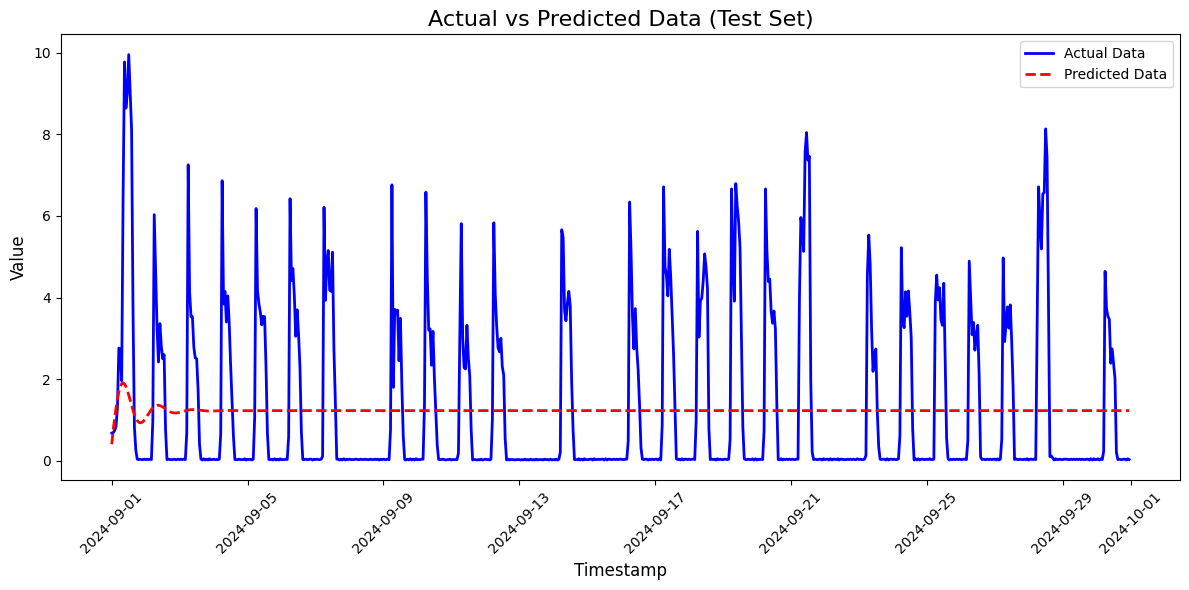

In [187]:

y_true = test_data['y']
y_pred = forecast['AutoARIMA']

    # Plotting the actual versus predicted data
plt.figure(figsize=(12, 6))

    # Plot actual values (test data)
plt.plot(test_data['ds'], y_true, label='Actual Data', color='blue', linewidth=2)

    # Plot predicted values (forecasted data)
plt.plot(forecast_df.index, forecast['AutoARIMA'], label='Predicted Data', color='red', linestyle='--', linewidth=2)

    # Adding title and labels
plt.title("Actual vs Predicted Data (Test Set)", fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Value", fontsize=12)

    # Rotate x-axis labels for better readability
plt.xticks(rotation=45)

    # Adding a legend
plt.legend()

    # Show the plot
plt.tight_layout()
plt.show()

